In [1]:
from mtcnn.mtcnn import MTCNN
from arcface.arcface import ArcFace

In [2]:
from mtcnn.visualization_utils import show_bboxes
import PIL
from PIL import Image

In [3]:
image = Image.open('images/framex1.jpg')
image = image.convert(mode='RGB')
width, height = image.size
image = image.resize((int(width/2), int(height/2)))
# image.save('a1.jpg', optimize=True, quality=100)
# image = Image.open('a1.jpg')

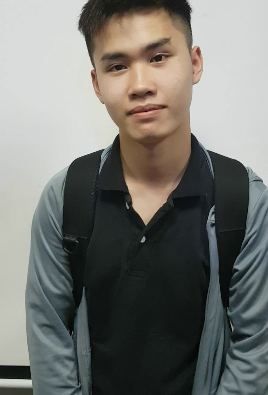

In [4]:
image

In [5]:
mtcnn = MTCNN()
mtcnn.factor = 0.9
bounding_boxes, landmarks = mtcnn.detect(image, thresholds=[0.5, 0.7, 0.8])

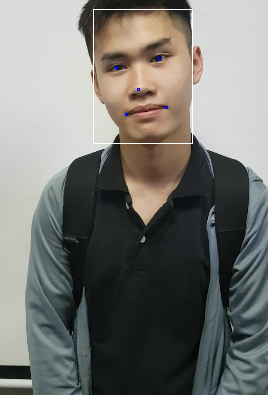

In [6]:
show_bboxes(image, bounding_boxes, landmarks)

In [7]:
_, _, faces = mtcnn.align(image, thresholds=[0.7, 0.7, 0.8])

In [8]:
len(faces)

1

In [9]:
for i in range(len(faces)):
    faces[i].save('img/img{}.jpg'.format(i))

In [10]:
arcface = ArcFace()

In [11]:
from torchvision import transforms

In [12]:
img = faces[0]

In [13]:
img1 = transforms.functional.hflip(faces[0])

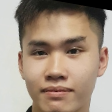

In [14]:
img

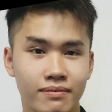

In [15]:
img1

In [16]:
img2 = faces[1]
img2

IndexError: list index out of range

In [ ]:
emb = arcface.embed(img)
emb1 = arcface.embed(img1)
emb2 = arcface.embed(img2)

In [ ]:
import numpy as np
print(np.linalg.norm(emb-emb1))
print(np.linalg.norm(emb-emb2))
print(np.linalg.norm(emb1-emb2))

In [ ]:
import cv2
imgx = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)

In [ ]:
cv2.imwrite('./a.jpg', imgx)

In [ ]:
imgxx = cv2.cvtColor(np.array(imgx), cv2.COLOR_RGB2BGR)
imgxx = Image.fromarray(imgxx)
imgxx

In [ ]:
type(faces[0])